In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import uproot as ur
import awkward as ak
import numpy as np

In [3]:
mac = False

In [4]:
data_path = '/fast_scratch/atlas_images/v01-45/'
if mac:
    data_path = '/Users/swiatlow/Data/caloml/graph_data/'

In [5]:
path_pipm = data_path + 'pipm_medium.root'
path_pi0  = data_path + 'pi0_medium.root'

In [6]:
# path_pipm = data_path + 'pipm/user.angerami.24559744.OutputStream._000502.root'
# path_pi0 = data_path + 'pi0/user.angerami.24559740.OutputStream._000502.root'

In [7]:
tree_pipm = ur.open(path_pipm)['EventTree']
tree_pi0  = ur.open(path_pi0)['EventTree']

In [8]:
geoDict_tree_pipm = ur.open(path_pipm)['CellGeo']
geoDict_tree_pi0  = ur.open(path_pi0)["CellGeo"]

In [9]:
import sys
sys.path.append('/Users/swiatlow/Code/ML4P/LCStudies')
sys.path.append('/home/mswiatlowski/start_tf/LCStudies')
from  util import graph_util as gu
from  util import plot_util as pu

In [10]:
cell_id_pipm = gu.loadArrayBranchFlat('cluster_cell_ID', tree_pipm, 2000)

In [11]:
cell_e_pipm = gu.loadArrayBranchFlat('cluster_cell_E', tree_pipm, 2000)

In [12]:
cell_id_pi0 = gu.loadArrayBranchFlat('cluster_cell_ID', tree_pi0, 2000)
cell_e_pi0 = gu.loadArrayBranchFlat('cluster_cell_E', tree_pi0, 2000)

In [13]:
geoDict_pipm = gu.loadGraphDictionary(geoDict_tree_pipm)
geoDict_pi0  = gu.loadGraphDictionary(geoDict_tree_pi0)

In [14]:
cell_phi_pipm = gu.convertIDToGeo(cell_id_pipm, 'cell_geo_phi', geoDict_pipm)
cell_eta_pipm = gu.convertIDToGeo(cell_id_pipm, 'cell_geo_eta', geoDict_pipm)

In [15]:
cell_phi_pi0 = gu.convertIDToGeo(cell_id_pi0, 'cell_geo_phi', geoDict_pi0)
cell_eta_pi0 = gu.convertIDToGeo(cell_id_pi0, 'cell_geo_eta', geoDict_pi0)

In [16]:
clus_eta_pipm = gu.loadVectorBranchFlat('cluster_Eta', tree_pipm)
clus_E_pipm = gu.loadVectorBranchFlat('cluster_E', tree_pipm)

clus_eta_pi0 = gu.loadVectorBranchFlat('cluster_Eta', tree_pi0)
clus_E_pi0 = gu.loadVectorBranchFlat('cluster_E', tree_pi0)

In [17]:
clus_phi_pipm = gu.loadVectorBranchFlat('cluster_Phi', tree_pipm)
clus_phi_pi0  = gu.loadVectorBranchFlat('cluster_Phi', tree_pi0)

In [18]:
eta_mask_pipm = abs(clus_eta_pipm) < 0.7
eta_mask_pi0  = abs(clus_eta_pi0) < 0.7

In [19]:
energy_mask_pipm = clus_E_pipm > 0.5
energy_mask_pi0 = clus_E_pi0 > 0.5

In [20]:
selection_pipm = eta_mask_pipm & energy_mask_pipm
selection_pi0 = eta_mask_pi0 & energy_mask_pi0

In [21]:
cell_eta_norm_pipm = np.nan_to_num(cell_eta_pipm - clus_eta_pipm[:, None])
cell_eta_norm_pi0 = np.nan_to_num(cell_eta_pi0 - clus_eta_pi0[:, None])
cell_phi_norm_pipm = np.nan_to_num(cell_phi_pipm - clus_phi_pipm[:, None])
cell_phi_norm_pi0 = np.nan_to_num(cell_phi_pi0 - clus_phi_pi0[:, None])

In [22]:
cell_e_norm_pipm = np.nan_to_num(np.log(cell_e_pipm), posinf = 0, neginf=0)
cell_e_norm_pi0 = np.nan_to_num(np.log(cell_e_pi0), posinf = 0, neginf=0)

<ipython-input-22-c48a3c03326e>:1: RuntimeWarning: divide by zero encountered in log
  cell_e_norm_pipm = np.nan_to_num(np.log(cell_e_pipm), posinf = 0, neginf=0)
<ipython-input-22-c48a3c03326e>:2: RuntimeWarning: divide by zero encountered in log
  cell_e_norm_pi0 = np.nan_to_num(np.log(cell_e_pi0), posinf = 0, neginf=0)


In [23]:
# Working after some careful manipulation of the masks
cell_samp_pipm = gu.convertIDToGeo(cell_id_pipm, 'cell_geo_sampling', geoDict_pipm)
cell_samp_pi0 = gu.convertIDToGeo(cell_id_pi0, 'cell_geo_sampling', geoDict_pi0)

In [24]:
#normalize to a lower value fairly arbitrarily
cell_samp_norm_pipm = cell_samp_pipm * 0.1
cell_samp_norm_pi0 = cell_samp_pi0 * 0.1

In [25]:
X_pipm = np.stack((cell_e_norm_pipm[selection_pipm], cell_eta_norm_pipm[selection_pipm], cell_phi_norm_pipm[selection_pipm], cell_samp_norm_pipm[selection_pipm]), axis = 2)
X_pi0  = np.stack((cell_e_norm_pi0[selection_pi0], cell_eta_norm_pi0[selection_pi0], cell_phi_norm_pi0[selection_pi0], cell_samp_norm_pi0[selection_pi0]), axis = 2)

In [26]:
X = np.concatenate((X_pipm[:90000], X_pi0[:90000]))

In [30]:
np.save(data_path+'X_4.npy', X)

<Figure size 799.992x599.976 with 0 Axes>

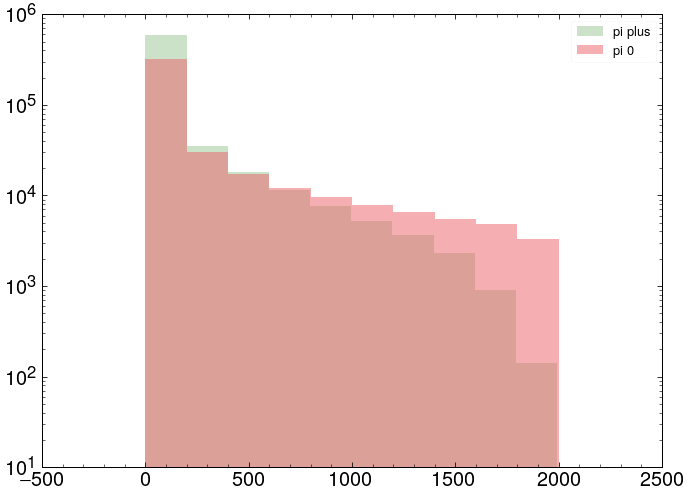

In [28]:
import matplotlib.pyplot as plt
plt.cla()
plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(clus_E_pipm, alpha = 0.5, label = 'pi plus')
plt.hist(clus_E_pi0, alpha = 0.5, label = 'pi 0')
plt.legend()
plt.yscale('log')
plt.show()

In [29]:
## Above means we'll probably want to downsample to the same energy spectrum at some point